<a href="https://colab.research.google.com/github/AlGhifaryAN/MachineLearningTasksTK44G4/blob/main/K_Means_Clustering_iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#Nama  : Al Ghifary Akmal Nasheeri
#NIM   : 1103201242
#Kelas : TK-44-G4

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [31]:
# Load the Iris dataset
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)

# Select columns for clustering
selected_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df_selected = iris_df[selected_columns]

In [32]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

In [33]:
# Initialize lists to store evaluation metrics
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

In [34]:
# Try different numbers of clusters (k) from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df_scaled)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(df_scaled, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Calculate Calinski-Harabasz Index
    calinski_harabasz_score_value = calinski_harabasz_score(df_scaled, labels)
    calinski_harabasz_scores.append(calinski_harabasz_score_value)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [35]:
# Print evaluation metrics for different k values
for k in range(2, 11):
    print(f'k={k}: Silhouette Score={silhouette_scores[k-2]:.4f}, Davies-Bouldin Index={davies_bouldin_scores[k-2]:.4f}, Calinski-Harabasz Index={calinski_harabasz_scores[k-2]:.4f}')


k=2: Silhouette Score=0.5818, Davies-Bouldin Index=0.5933, Calinski-Harabasz Index=251.3493
k=3: Silhouette Score=0.4599, Davies-Bouldin Index=0.8336, Calinski-Harabasz Index=241.9044
k=4: Silhouette Score=0.3850, Davies-Bouldin Index=0.8698, Calinski-Harabasz Index=206.6806
k=5: Silhouette Score=0.3459, Davies-Bouldin Index=0.9483, Calinski-Harabasz Index=202.9515
k=6: Silhouette Score=0.3220, Davies-Bouldin Index=1.0584, Calinski-Harabasz Index=187.1401
k=7: Silhouette Score=0.3277, Davies-Bouldin Index=0.9900, Calinski-Harabasz Index=177.4803
k=8: Silhouette Score=0.3406, Davies-Bouldin Index=0.9101, Calinski-Harabasz Index=174.4126
k=9: Silhouette Score=0.3471, Davies-Bouldin Index=0.9074, Calinski-Harabasz Index=177.8541
k=10: Silhouette Score=0.3614, Davies-Bouldin Index=0.8561, Calinski-Harabasz Index=180.8569


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


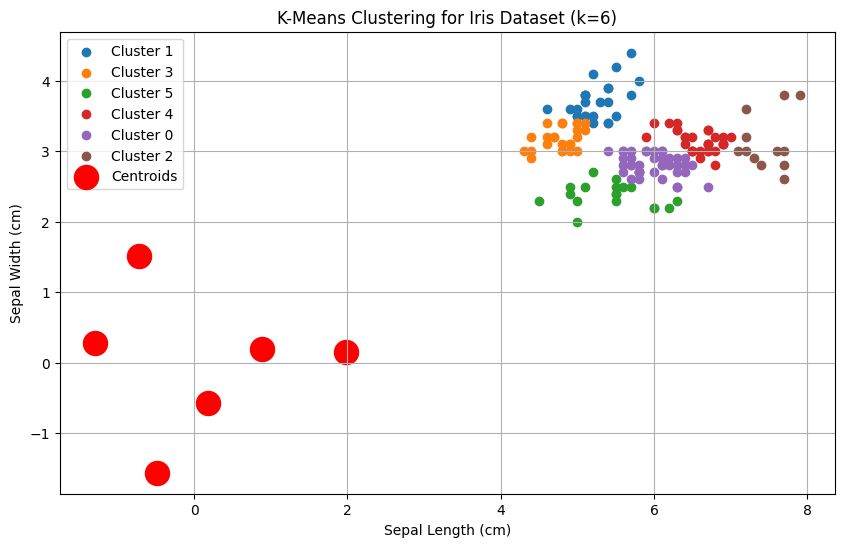

In [36]:
# Select two columns for clustering and visualization
selected_columns = ['sepal length (cm)', 'sepal width (cm)']
df_selected = iris_df[selected_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Initialize K-Means model with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0)

# Fit the model to the data and add the 'label' column to the DataFrame
iris_df['label'] = kmeans.fit_predict(df_scaled)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
for label in iris_df['label'].unique():
    plt.scatter(iris_df[iris_df['label'] == label]['sepal length (cm)'], iris_df[iris_df['label'] == label]['sepal width (cm)'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering for Iris Dataset (k=6)')
plt.legend()
plt.grid(True)
plt.show()

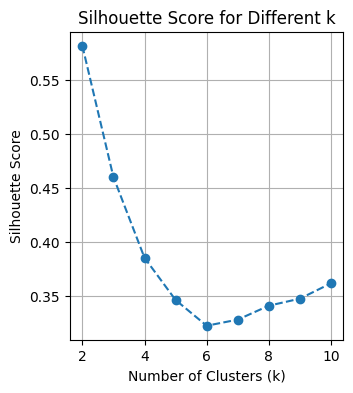

In [37]:
# Visualize Silhouette Score
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)

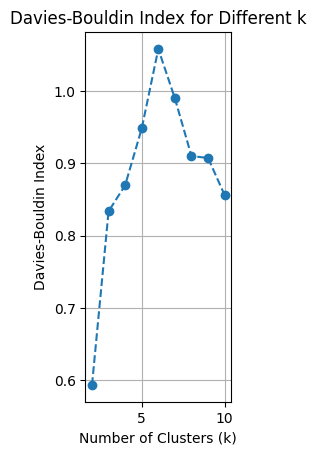

In [38]:
# Visualize Davies-Bouldin Index
plt.subplot(132)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different k')
plt.grid(True)

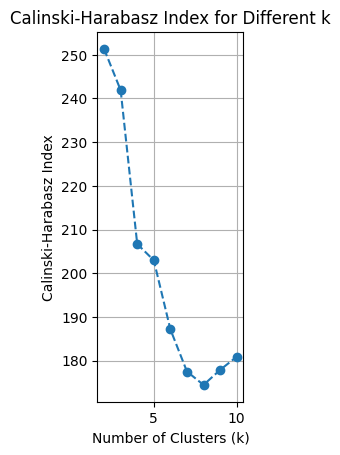

In [39]:
# Visualize Calinski-Harabasz Index
plt.subplot(133)
plt.plot(range(2, 11), calinski_harabasz_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different k')
plt.grid(True)

In [40]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>